**Name: Christ-Brian Amedjonekou, Hans Ndeffo**  
**Date: 11/05/2018**  
**TCET 2102-D278 (Telecommunications) Lab 1**  
**Fall 2018, Section: D278, Code: 37580**  
**Instructor: Layth Qaseer**

### Abstract

**For this lab we had to do the following:**

1. **Learn how to read, use, compare instruments that are dB/dBm-calibrated.**
2. **Relate dB measurements to Voltage measurements.**
3. **Determine the cuttoff frequencies of the RC low pass filter using the difference in dB measurements.**
4. **Evaluate the effects of instrument loading on frequency response.**
5. **Use Thevenin's theorem to calculate a circuit's loaded response.**
6. **Use Audio Test Set, its functions, ranges and limitations; connections, switches, dials, and indicator.**
7. **Use VOM to read dB values, and how the changing ranges affect the dB scale and input impedance.**

### Equipment

* **Audio Test Set**
* **Analog Volt Ohm Meter**
* **Oscilloscope**
* **Digital Multimeter**
* **10 k$\Omega \space \frac{1}{4}$-watt Resistor**
* **0.01 $\mu$F Capacitor**


### Theory

**Filters: Any combination of passive (R, L, and C) and/or active (transistors or operational amplifiers) elements designed to select or reject a band of frequencies is called a filter.**

*  In communication systems, filters are employed to pass those frequencies containing the desired information and to reject the remaining frequencies.

**Filters are employed to filter out any unwanted frequencies, commonly called noise, due to the nonlinear characteristics of some elec- tronic devices or signals picked up from the surrounding medium. In general, there are two classifications of filters:**

* Passive Filters - contains only passive elements (e.g: resistors, capacitors, inductors) **"Passive filters are those filters composed of series or parallel combinations of R, L, and C elements."**
    $$\space$$
    * Low Pass Filters - allows lower frequencies producing a gain about the cuttoff to pass through while higher frequencies are attenuated.

### Low Pass

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^2 + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$

In [168]:
import math as m
def lowpassfilter_voltagegain(f_c, f, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

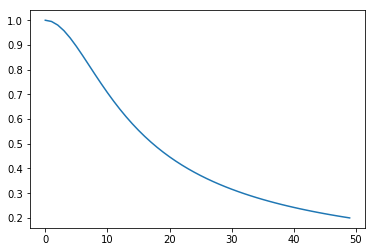

In [188]:
from matplotlib import pyplot as plt
import numpy as np

list1 = [x for x in range(0, 50)]
list2 = [lowpassfilter_voltagegain(10, x)[0] for x in range(0, 50)]
frequency = np.array(list1)
gain = np.array(list2)
plt.plot(frequency, gain)

In [189]:
frequency

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [190]:
gain

array([1.        , 0.99503719, 0.98058068, 0.95782629, 0.92847669,
       0.89442719, 0.85749293, 0.81923192, 0.78086881, 0.74329415,
       0.70710678, 0.67267279, 0.6401844 , 0.60971076, 0.58123819,
       0.5547002 , 0.52999894, 0.50702013, 0.48564293, 0.46574643,
       0.4472136 , 0.42993358, 0.41380294, 0.39872611, 0.38461538,
       0.37139068, 0.35897908, 0.34731436, 0.3363364 , 0.32599068,
       0.31622777, 0.30700278, 0.29827499, 0.2900074 , 0.28216632,
       0.27472113, 0.26764386, 0.26090903, 0.2544933 , 0.24837535,
       0.24253563, 0.23695618, 0.23162053, 0.22651349, 0.2216211 ,
       0.21693046, 0.21242964, 0.20810764, 0.20395425, 0.19996001])

#### Butterworth Low Pass Filter

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^{2n} + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$A_V = \Big|\frac{V_O}{V_I} \Big|^2=  \frac{1}{\left(\frac{f}{f_C}\right)^{2n} + 1} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$|H(j\omega)|=  \frac{1}{\left(\frac{\omega}{\omega_C}\right)^{2n} + 1}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$  
$$n = \textbf{ number of elements in the filter}$$  
$$|H(j\omega)| = \textbf{Transfer Function}$$

In [187]:
def butterworth_lowpassfilter_voltagegain(f_c, f, n, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    
    # n is the number of elements in the filter
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2*n) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

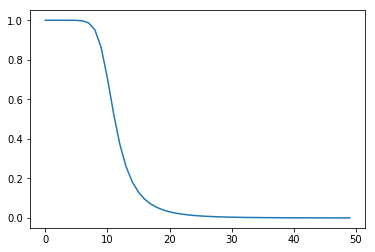

In [199]:
list3 = [x for x in range(0, 50)]
list4 = [butterworth_lowpassfilter_voltagegain(10, x, 5)[0] for x in range(0, 50)]
frequency1 = np.array(list3)
gain1 = np.array(list4)
plt.plot(frequency1, gain1)

In [200]:
frequency1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [201]:
gain1

array([1.00000000e+00, 1.00000000e+00, 9.99999949e-01, 9.99997048e-01,
       9.99947575e-01, 9.99512076e-01, 9.96990333e-01, 9.86168585e-01,
       9.50282656e-01, 8.61084541e-01, 7.07106781e-01, 5.27504932e-01,
       3.72892045e-01, 2.60061980e-01, 1.82801411e-01, 1.30560053e-01,
       9.49366868e-02, 7.02555978e-02, 5.28481938e-02, 4.03532119e-02,
       3.12347524e-02, 2.44778563e-02, 1.94001395e-02, 1.55348981e-02,
       1.25576839e-02, 1.02394632e-02, 8.41623548e-03, 6.96900270e-03,
       5.81035292e-03, 4.87533934e-03, 4.11519149e-03, 3.49292195e-03,
       2.98021900e-03, 2.55522344e-03, 2.20092054e-03, 1.90396513e-03,
       1.65381491e-03, 1.44208523e-03, 1.26206485e-03, 1.10834942e-03,
       9.76562034e-04, 8.63138631e-04, 7.65162048e-04, 6.80232882e-04,
       6.06368368e-04, 5.41922730e-04, 4.85524098e-04, 4.36024275e-04,
       3.92458536e-04, 3.54013295e-04])

**For this lab we'll be using a low pass filter which is a first order low pass Butterworth Filter. The variables **

## Precalculations

**1. Calculating the voltage in dB at 2.8 Vpp.**

$$\text{dBm} = 20 \log\Big(\frac{\frac{2.8}{2\sqrt{2}}}{0.775}\Big) = 2.12 \text{ dB}$$

In [211]:
Vrms = ((2.8) * (1/(2*m.sqrt(2))))
A_V = Vrms/0.775
A_V

1.277354185369247

In [212]:
from EETCET_modkit import DigitalTelephonyTCET as tcet
tcet.relativeVoltDecibel(A_V)

2.1262267067987413

**2. Determining the period at 250Hz.**

$$T = \frac{1}{f} = \frac{1}{250} = 4 \text{ ms}$$

In [213]:
frq = 250
prd = 1/frq
prd

0.004

**3. Assuming the VOM has an internal impedance of 5 k$\Omega$ per volt, calculate the meter's loading, $R_{VOM}$ in dB at the 2.5 $V_{ac}$ range.**

$$R_{VOM} = 10 \log\Big(\frac{\frac{2.52}{12500}}{\frac{0.775^2}{600}}\Big) = - 6.959 \text{ dB}$$

In [216]:
pO = 2.52/12500
pI = m.pow(0.775, 2)/600
A_P = pO/pI
Rvom = tcet.relativePowerDecibel(A_P)
Rvom

-6.9596162685548935

**4. Assuming that ATS has an input loading affect, $R_{ATS}$ in parallel with $R_{VOM}$, calculate the voltage at the circuit output Point B in Procedure Step 3 (b). The ATS has a source impedance, $R_{GEN}$ and voltage of 1 $V_{RMS}$. Assume near DC condition (Frequency = 0 Hz) condition with $V_{DC} = 0$ or that the capacitor is removed. The student is to find the values of $R_{ATS}$ and $R_{GEN}$ from the ATS equipment manual.** 

$$VB = V_{IN}*\frac{12.51 \Omega || 30 \Omega}{12.51 \Omega || 30 \Omega + 10.6} = 0.454 \space V$$
   

In [221]:
num = (12.51 * 30)/(12.51 + 30)
denom = (12.51 * 30)/(12.51 + 30) +10.6
Vin = 1
Vb = Vin * (num/denom)
Vb

0.45441006603657075

5. Calculate the dB value at Point Busing the 0.775 $V_{RMS}$ reference voltage.

$$dB = 20\log(\frac{0.454}{0.775}) = -4.63 \space dB$$

In [222]:
tcet.relativeVoltDecibel(Vb/0.775)

-4.637075185163916

6. Calculate the dBm value at Point B with an assumed load at Point B of 600 $\Omega$.

$$dBm = 20\log{\frac{\frac{6}{112}}{0.775}} = -23.2$$

In [223]:
tcet.relativeVoltDecibel((6/112)/0.775)

-23.207369495856966

7. Calculate the dBm at Point B with an actual load at Point B of $R_{VOM} || R_{ATS}$·

$$dBm = 20\log(\frac{V_B}{0.775}) = -4.63$$

In [224]:
tcet.relativeVoltDecibel(Vb/0.775)

-4.637075185163916

8. Calculate the cut-off frequency, Fe from Thevenin's equivalent circuit: $F_c = 1|(2\pi R_{TH} * C) = 3.3 \space kHz$ where $R_TH = (10k\Omega + R_{\text{gen of ATS}}) || R_{COM} || R_{ATS})$

$$X_C = R_{TH} = 10.6||2.5||30= 4.8 \space khz$$  
$$F_c = 1|(2\pi R_{TH} * C) = 3.3 \space kHz$$  
$$\frac{1}{2 \pi F_c C} = 4.82 \space khz$$  


9. Calculate the voltage at Point B for the computed $F_e$ using voltage division. Where $V_B = (Z_{LOAD} | (Z_{LOAD} + 10k\Omega + R_{GEN}) * V_{GEN(rms)} = 0.3125 \space V$. Reactance note: $-jXc$ is parallel withl $R_{VOM}$ and $R_{ATS}$

$$V_B= \frac{4.82}{4.82 + 10.6} = .312 $$

In [227]:
v_B = 4.82/(4.82 + 10.6)
v_B

0.3125810635538262

10. Calculate voltage V(f) at Point B for f =Fe, using the single-pole LPF voltage ratio formula:

$$V(f_C) = \frac{V(f)}{V(dc)}= \frac{0.312}{0.454} = 0.69 \space V$$

In [229]:
Vfc = v_B/Vb
Vfc

0.6878832290846959

11. Calculate the dB from the voltage at Point B for frequency FC·

$$V_B(dB) = 20\log(0.69) = -3.22$$

In [230]:
tcet.relativeVoltDecibel(Vfc)

-3.2497055744840626

12. a) Calculate the dB difference between Pre-calculations # 11 and # 5. b) Show that the dB from the voltage ratio in Pre-calculation# 10 is equal to the value in# 12a): 20 x Log V(f) I V(dc)

In [231]:
tcet.relativeVoltDecibel(-10.166/-4.6)

6.887845473702216

* -3.25 dB, 6.845 dB

13. Show that the frequency of approximately 250Hz is an adequate starting reference instead of DC (OHz) for determining the 3dB cut-off frequency, Fe. This is done by showing that the dB difference between DC and 250Hz at the output, Point B is very small (compared to 3dB): 20 Log [V(f) I V(DC)]

In [232]:
tcet.relativeVoltDecibel(Vfc)

-3.2497055744840626

14. From the dB value in Pre-calculation# 12 and the dB result of Pre- calculation# 13, find that 

    * V(Fc) I V(f = 250Hz)= 10(dB/20).

In [233]:
m.pow(10, (6.845/20))

2.1991254268505096

# Run I

### Step 1

1. Connect the Test Circuit as per Figure 1 leaving the ATS output terminal disconnected. Connect the ATS input terminal and VOM (2.5Vac range) to Point B.
2. Turn the ATS Level knob completely counter-clockwise and set the ATS switches (left to right): ON, NORM, VAR, BRIDGE, LEVEL, and MONITOR.
3. Record the VOM ac impedance from the faceplate: $\underline{\textbf{5000}}$ ac ohms/volt
4. Record the dB correction information from the VOM faceplate for each voltage range and calculate the correction: 


In [218]:
import pandas as pd

data1 = {'Range (Volts)': [10, 50, 250], 
         'Correction (dB)': [12, 26, 40]}

df1 = pd.DataFrame.from_dict(data1)
df1

,Range (Volts),Correction (dB)
0,10,12
1,50,26
2,250,40


### Step 2

1. Connect the oscilloscope’s channel 1 and the DMM to the open circuit ATS output terminal as in Figure 1. Adjust the ATS output using the frequency knob between 250 Hz and 275 Hz. Set the LEVEL/FREQ switch to LEVEL mode and adjust the amplitude until approximately 1.0Vrms reads on the DMM; the reading should be approximately 2.8Vpp on the oscilloscope.
2. Record ATS (dB) in MONITOR mode $\underline{\textbf{3.3}}$ dB
3. Record the oscilloscope channel 1 voltage $\underline{\textbf{1.7}}$ pp(vertical boxes) x $\underline{\textbf{2}}$ volt/box= $\underline{\textbf{3.4}}\space V_{pp}$
4. Record the DMM value $\underline{\textbf{1.019}} V_{rms}$
5. Record the period on the oscilloscope: $\underline{\textbf{4}}$ (horizontal boxes) $\underline{\textbf{1 m}}$ sec/box= $\underline{\textbf{4m}}$ sec


### Step 3: Set VOM to 2.5 Vac range and follow steps 3 & 4.

* a. Connect the oscilloscope’s channel 1 to the circuit input at Point A and connect the ATS output to the circuit input at Point A in Figure 2.

    * 3.1 Record the DMM value $\underline{\textbf{.085}} \space V_{rms}$  
    * 3.2 Record The oscilloscope’s channel 1 voltage: $\underline{\textbf{1.72}}$ p-p(vertical boxes) $*$ $\underline{\textbf{2}}$ volt/box= $\underline{\textbf{3.7}}$ $V_{pp}$  
    * 3.3 Record the VOM readings $\underline{\textbf{1.3}}$ $V_{rms}$ and $\underline{\textbf{1.5}}$ dB  
    * 3.4 Set the ATS MONITOR/NORM switch to Norm and record the value $\underline{\textbf{1.3}}$ dB  


* b. Connect the oscilloscope’s channel 2 to the circuit output at Point B and connect the ATS input terminal to the circuit output at Point B in Figure 2.

    * 3.5 Record the DMM value $\underline{\textbf{.566}}$ $V_{rms}$  
    * 3.6 Record the oscilloscope channel 2 voltage: $\underline{\textbf{3.35}} \space V_{pp}$ (vertical boxes) x $\underline{\textbf{500m}}$ volt/box = $\underline{\textbf{1.66}} \space V_{pp}$  
    * 3.7 Record the VOM readings $\underline{\textbf{0.6}} V_{rms}$ and $\underline{\textbf{0.7}}$ dB  
    * 3.8 Set the ATS MONITOR/NORM switch to NORM and record the value: $\underline{\textbf{1.6}}$ dB  



### Step 4

* a. Change LEVEL/FREQ mode to FREQ and slowly rotate the ATS frequency knob clockwise to increase the frequency, or counter-clockwise to decrease the frequency until the ATS shows a reading in the NORM mode of the MONITOR/NORM switch of 3dB less than the dB value in Step 3.8.
    $$\space$$
    * Record the ATS value $\underline{\textbf{0}}$ dB
    * Record the VOM value $\underline{\textbf{.48}}$ dB


* b. Switch the ATS to FREQ mode to record the frequency $\underline{\textbf{3.3}}$ kHz  
* c. Record the period on the oscilloscope: 3 (horizontal boxes) $*$ $\underline{\textbf{100}} \mu$ sec/box = $\underline{\textbf{300}}\mu$ sec

### Step 5: SET VOM to 10 Vac range and follow steps 5 & 6.

* Connect the oscilloscope’s channel 1 to the circuit input at Point A and connect the ATS output to the circuit input at point A in Figure 2. 

    * 5.1 Record the DMM Value $\underline{\textbf{.088}} V_{rms}$
    * 5.2 Record the oscilloscope’s channel 1 voltage:  $\underline{\textbf{1.7}}$ pp(vertical boxes) $* \space \underline{\textbf{2}}$ volt/box = $\underline{\textbf{3.9}} \space V_{pp}$
    * 5.3 Record the VOM readings $\underline{\textbf{1.15}} V_{rms}$ and $\underline{\textbf{13.4}}$ dB
    * 5.4 Set the ATS MONITOR/NORM switch to NORM and record the value $\underline{\textbf{1.7}}$ dB
        * Connect the oscilloscope’s channel 2 to the circuit output at Point B and connect the ATS input terminal to the circuit output at Point B in Figure 2.
    * 5.5 Record the DMM value $\underline{\textbf{.562}} V_{rms}$
    * 5.6 Record the oscilloscope channel 2 voltage: $\underline{\textbf{3.3}} V_{pp}$(vertical boxes) * $\underline{\textbf{500m}}$ volt/box = $\underline{\textbf{1.64 }} V_{pp}$ 
    * 5.7 Record the VOM readings $\underline{\textbf{.5}} V_{rms}$ and $\underline{\textbf{12.5}}$ dB
    * 5.8 Set the ATS MONITOR/NORM switch to NORM and record the value $\underline{\textbf{1.6}}$ dB

### Step 6
* Change LEVEL/FREQ mode to FREQ and slowly rotate the ATS frequency knob clockwise to increase the frequency, or counter-clockwise to decrease the frequency until the ATS shows a reading in the NORM mode of the MONITOR/NORM switch of 3dB less than the dB value in Step 5.8.
    $$\space$$
    * Record the ATS value $\underline{\textbf{0}}$ dB
    * Record the VOM value $\underline{\textbf{12.48}}$ dB
    

* Switch the ATS to FREQ mode to record the frequency $\underline{\textbf{3.3}}$ kHz
* Record the period on the oscilloscope: $\underline{\textbf{3}}$ (horizontal boxes) x   $\underline{\textbf{100}} \mu$ sec/box= $\underline{\textbf{300}} \mu$ sec

## Questions

1. Calculate the dB value from the scope’s Vpp result in Step 2c.  3.804 dB
    $$\space$$
    * Calculate the dB value from the DMM’s Vrms result in Step 2d.   2.37 dB
    * Compare it with the dB value in Pre-calculation #1:
    $$\space$$
        * Pre-calc = $\underline{\textbf{2.12}}$ dB
        * $\underline{\textbf{3.4}} \space V_{pp} | 20 \log (\frac{1.201}{0.775}) = 3.804$ dB
        * $\underline{\textbf{1.019}} V_{rms} | 20 \log (\frac{1.019}{0.775})= 2.37$ dB
        
        
2. Calculate the frequency from the oscilloscope’s measurement in Step 2e.  
    $$\space$$
    * 250 Hz; $f = \frac{1}{T} = {1}{4 \text{ms}} = 250$ Hz
    

3. Repeat the calculation for Question #1 with the DMM and oscilloscope readings taken in Steps 3d; compare it with the dB value in Pre-calculation #1.
    $$\space$$
    * Pre calc = 2.12 dB
    * DMM = -2.76 dB       
    * Oscilloscope= -2.42 dB

$$1.6 \space V_{pp} | 20 \log(\frac{0.586}{0.775})= -2.42 dB$$  
$$.566 \space V_{rms} | 20 \log(\frac{0.566}{0.775})= -2.76 dB$$  

4. Calculate the cutoff frequency, Fc= 1/(2πRC) where R= (10kΩ+Rgen of                     ATS)||Rvom||Rats
    $$\space$$
    * $$R = 10.6||12.5||30 = 4.8$$ khz     
    * $$f_c = \frac{1}{2 \pi R c}= 3.$$ khz
    $$\space$$
5. Find Fc and V(f)/V(DC) at 0 Hz, 250 Hz, and 3.36 kHz from Fig.2 in Steps 3&4.

$$0 Hz= \frac{1}{\sqrt{1+(\frac{0}{3.3*10^3})^2}} = 1$$  
$$250 Hz = \frac{1}{\sqrt{1+\frac{250}{3.3x10^3}^2}} = 0.997$$       
$$3.36 kHz= \frac{1}{\sqrt{1+\frac{3.36}{3.3}^2}} = 0.7007$$    
$$20\log(0.707) = -3dB$$  

6. Find $F_c$ and $\frac{V(f)}{V(DC)}$ at 0 Hz, 250 Hz, and 2.35 kHz from Fig.2 in Steps 5 & 6.

    * 1
    * 0.997
    * 0.81
    * -1.83 db


7. Explain any differences between each result in Questions # 5 and 6, and any deviations in the results from expected values such as 0.707 and -3dB.

    * The differences between each results in #5 and #6: 3.36kHz gives us .7007 in #5; 2.35kHz gives us .81 in #6.
    * The value .7007 is close to the expected value of .707, which yields a percent error of .9%, as for the dB value, we have -3dB which yields a percent error of 0%.


## Conclusion

* Doing "dB Measurements and RC Low Pass Filter" experiment helped us practice the dB and $V_{RMS}$ readings using the VOM. Also, there were some difficulties that had been encountered but this was fixed with dB/dBm calibration according to the lab manual. The cut-off frequency have been computed and verified in the lab and in the simulation on multisim. In addition, using the oscilloscope and bode plotter allowed us to plot the function  and visualize the input signal.

In [ ]:
### Lab 2 Calculations

dta2 = {'Z(a) Ohm': [656], 'Z(b) Ohm': [37.8], 'Z(c) Ohm': [21.2]}
df2 = pd.DataFrame.from_dict(dta2)
df2